In [1]:
import matplotlib.pyplot as plt

def MakePlot(simData, checkData, simCaseLabel):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(checkData['time'], checkData[simCaseLabel],'g', 
             simData.RecData.Metric['time'], simData.RecData.Imperial[simCaseLabel], 'b')
    ax1.set(xlabel='time (s)', ylabel=simCaseLabel, title=simCaseLabel)
    ax1.legend(["NESC","pierpont"])

In [2]:
import logging
import math
from pierpont import daveML

###############################################################################
class UnitTest:
    """A unit test class.  
    
    A base class that other classes derive for unit testing.
    
    Attributes:
        FailCount: The number of failed tests.
        ClassName: A string to identify the class performing the unit test.
    """

    FailCount = 0
    ClassName = " "
    
    def TestValue(self, actualValue, testValue, label, tol):
        """Tests whether two values match within a tolerance.  
        
        A string label is passed to identify the test. An error via logging is
        printed if the test fails.
        
        Example:
            TestValue( 2, 1+1, "SimpleAdd", 1e-2)

        Args:
            actualValue: The expected value from doing the test.
            testValue: The computed value from doing the test.
            label: A label to identify the specific test.
            tol: The tolerance for the actual and test values to match.
        """
        if abs(actualValue - testValue) > tol:
            self.FailCount += 1
            labelStr = "[" + self.ClassName + "]" + label
            actStr = labelStr + ": Test failed. Expected: {};".format(actualValue)
            calStr = " Calculated: {}".format(testValue)
            logging.error(actStr+calStr)
            
    def TestArray(self, arrayData):
        """Performs multiple tests on an array of data. 
        
        Example:
            Create a data array containing the desired value, the test value,
            the identity string, and the tolerance.
            
            checkData = (
              (  4.0, 2.0*2.0, "MultipleTest", 1e-6),
              ( 16.0, 8.0+8.0, "Add-Example",  1e-5)
            )
            
            TestArray(checkData)
        """
        for d in arrayData:
            self.TestValue( d[0], d[1], d[2], d[3] )

###############################################################################
class Convert(UnitTest):
    """A class for performing unit conversions.
    
    | unit           | abbreviation |
    |:---------------|:-------------|
    | second         | s            |
    | minute         | min          |
    | inch           | inch         |
    | foot           | ft           |
    | meter          | m            |
    | nautical mile  | nmi          |
    | statute mile   | smi          |
    | kilometer      | km           |
    | centimeter     | cm           |
    | millimeter     | mm           |
    | pound force    | lbf          |
    | Newton         | N            |
    | kilogram force | kgf          |
    | kilogram       | kg           |
    | pound mass     | lbm          |
    | slug           | slug         |
    | degree         | deg          |
    | radian         | rad          |
    | knot (nmi/hr)  | kt           |
    | nondimensional | nd           |

    Attributes:
        KnotToFps: scale factor to convert knots to feet per second.
        FpsToKnot: scale factor to convert feet per second to knots.
        MinToSec: scale factor to convert minutes to seconds.
        FeetToMeter: scale factor to convert feet to meters.
        MeterToFeet: scale factor to convert meters to feet.
        NmToFeet: scale factor to convert nautical miles to feet.
        FeetToNm: scale factor to convert feet to nautical miles.
        SqMeterToSqFeet: scale factor to convert square meters to square feet.
        SqFeetToSqMeter: scale factor to convert square feet to square meters.
        PoundToNewton: scale factor to convert pounds to Newtons.
        NewtonToPound: scale factor to convert Newtons to pounds.
        SlugToKg: scale factor to convert slugs to kilograms.
        KgToSlug: scale factor to convert kilograms to slugs.
        Slugft2ToKgm2: scale factor to convert slug-ft2 to kg-m2.
        Kgm2ToSlugft2: scale factor to convert kg-m2 to slug-ft2.
        DegToRad: scale factor to convert degrees to radians.
        RadToDeg: scale factor to convert radians to degrees.
        MpsToKt: scale factor to convert meters per second to knots.
        KtToMps: scale factor to convert knots to meters per second.
    """
    KnotToFps = 1.6878097112860893
    FpsToKnot = (1.0 / KnotToFps)
    MinToSec = 60.0
    FeetToMeter = 0.3048
    MeterToFeet = (1.0 / FeetToMeter)
    NmToFeet = 6076.115485564304
    FeetToNm = (1.0 / NmToFeet)
    SqMeterToSqFeet = (MeterToFeet*MeterToFeet)
    SqFeetToSqMeter = 1.0 / SqMeterToSqFeet
    PoundToNewton = 4.4482216152605
    NewtonToPound = 1.0 / PoundToNewton
    SlugToKg = 14.593902937
    KgToSlug = 1.0 / SlugToKg
    Slugft2ToKgm2 = 1.3558179618926
    Kgm2ToSlugft2 = 1.0 / Slugft2ToKgm2
    DegToRad = math.radians(1.0)
    RadToDeg = math.degrees(1.0)
    MpsToKt = 1.94384
    KtToMps = 0.5144444
    
    ImperialToSI = {
        "lbf": PoundToNewton,
        "slug": SlugToKg,
        "slugft2": Slugft2ToKgm2,
        "ft": FeetToMeter,
        "ft_s": FeetToMeter,
        "ft2": SqFeetToSqMeter,
        "deg": DegToRad,
        "deg_s": DegToRad,
        "km": 1000.0,
        "km_s": 1000.0,
        "kt": KtToMps,
        "m": 1,
        "m2": 1,
        "nd": 1
    }
    
    SiToImperial = {
        "m": MeterToFeet,
        "m2": SqMeterToSqFeet,
        "rad": RadToDeg,
        "rad_s": RadToDeg,
        "m_s": MpsToKt,
        "n": NewtonToPound,
        "kg": KgToSlug,
        "kgm2": Kgm2ToSlugft2,
        "s": 1,
        "m->ft": MeterToFeet,
        "m_s->ft_s": MeterToFeet,
        "rad->deg": RadToDeg,
        "rad_s->deg_s": RadToDeg,
        "m_s2->ft_s2": MeterToFeet,
        "n->lbf": NewtonToPound,
        "m_s->nmi_h": MpsToKt
    }
    
    def LogWarn(self, inUnit):
        """Log a warning for unrecognized unit.
        
        Args:
            inUnit: unit string value not recognized.
        """
        warnStr = units + " not recognized in ppConvert.  No conversion done."
        logging.warning(warnStr)
        
    def SetIC(self, inIC):
        """Convert initial conditions to SI.
        
        Args:
            inIC: initial conditions.
        """
        icData = {}
        for key,value in inIC.items():
            units = value[1].lower()
            factor = 1
            if units in self.ImperialToSI:
                factor = self.ImperialToSI[units]
            elif units not in self.SiToImperial:
                self.LogWarn(units)
            icData[key] = factor * value[0]
        return icData
    
    def ToSI(self, value, inUnits):
        """Convert a value from Imperial to SI units.
        
        Args:
            value: Imperial value to convert.
            inUnits: string value of the Imperial unit value.
            
        Returns:
            SI value.
        """
        units = inUnits.lower()
        factor = 1
        if units in self.ImperialToSI:
            factor = self.ImperialToSI[units]
        elif units not in self.SiToImperial:
            self.LogWarn(inUnits)
        return value*factor
    
    def ToImperial(self, value, inUnits):
        """Convert a value from SI to Imperial units.
        
        Args:
            value: SI value to convert.
            inUnits: string value of the SI unit value.
            
        Returns:
            Imperial value.
        """
        units = inUnits.lower()
        factor = 1
        if units in self.SiToImperial:
            factor = self.SiToImperial[units]
        elif units in self.ImperialToSI:
            self.LogWarn(inUnits)
            
        convertedValue = []
        for v in value:
            convertedValue.append(v*factor)
        return convertedValue
    
    def UnitTest(self):
        """Perform tests to check unit conversions."""
        self.ClassName = "Convert"
        checkData = (
            (     123.0,         72.876*self.KnotToFps, "KnotToFps", 1e-3),
            (      78.8,          133.0*self.FpsToKnot, "FpsToKnot", 1e-3),
            (     300.0,             5.0*self.MinToSec, "MinToSec", 1e-12),
            (  395.9352,       1299.0*self.FeetToMeter, "FeetToMeter", 1e-4),
            (    1299.0,     395.9352*self.MeterToFeet, "MeterToFeet", 1e-4),
            ( 3967703.4,           653.0*self.NmToFeet, "NmToFeet", 0.1),
            (     653.0,       3967703.4*self.FeetToNm, "FeetToNm", 0.1),
            ( 10.763910,          self.SqMeterToSqFeet, "SqMeterToSqFeet", 1e-6),
            (      13.0,    2.92252*self.PoundToNewton, "PoundToNewton", 1e-4),
            (       1.0, 0.73756215*self.Slugft2ToKgm2, "Slugft2ToKgm2", 1e-7),
            (    54.864,        self.FeetToMeter*180.0, "FeetToMeters", 1e-4),
            (1742.12598,        self.MeterToFeet*531.0, "MetersToFeet", 1e-5),
            (  178.5596, self.SqFeetToSqMeter*1922.0, "SqFeetToSqMeters", 1e-4),
            (   4412.64, self.PoundToNewton*992.0, "PoundsToNewtons", 0.01),
            (21.6930872, self.Slugft2ToKgm2*16.0, "SlugFt2ToKgM2", 1e-6),
            (161.0256, self.ToSI(36.2,"lbf"), "ToSI lbf->N", 1e-3),
            (161.0256, self.ToSI(36.2,"LBf"), "ToSI lbf->N", 1e-3),
            (105.7538001, self.ToSI(78.0,"slugft2"), "ToSI slugf2->kgm2", 1e-6),
            (531.0, self.ToSI(1742.12598,"ft"), "ToSI f->m", 1e-5),
            (9.7536, self.ToSI(32.0,"ft_s"), "ToSI fps-mps", 1e-4),
            (140.6552, self.ToSI(1514,"ft2"), "ToSI f2-m2", 1e-4),
            (math.pi, self.ToSI(180.0,"deg"), "ToSI deg->rad", 1e-6),
            (0.25*math.pi, self.ToSI(45.0,"deg_s"), "ToSI dps->rps", 1e-6),
            (93200, self.ToSI(93.2,"km"), "ToSI km->m", 1e-6),
            (4221, self.ToSI(4.221,"km_s"), "ToSI km_s->m_s", 1e-6)
        )
        
        self.TestArray(checkData)
        
        self.ClassName = "Convert IC"
        icTest = {
            "newtonTest": [36.2, "lbf"],
            "inertiaTest": [78.0, "slugft2"],
            "feetTest": [1742.12598, "ft"],
            "fpsTest": [32.0, "ft_s"],
            "ft2Test": [1514, "ft2"],
            "degTest": [180, "deg"],
            "dpsTest": [45.0, "deg_s"],
            "kmTest": [93.2, "km"],
            "kpsTest": [4.221, "km_s"]
        }
        icData = self.SetIC(icTest)
        self.TestValue(161.0256, icData["newtonTest"], "lbf->N", 1e-3)
        self.TestValue(105.7538001, icData["inertiaTest"], "slugf2->kgm2", 1e-6)
        self.TestValue(531.0, icData["feetTest"], "f->m", 1e-5)
        self.TestValue(9.7536, icData["fpsTest"], "fps-mps", 1e-4)
        self.TestValue(140.6552, icData["ft2Test"], "f2-m2", 1e-4)
        self.TestValue(math.pi, icData["degTest"], "deg->rad", 1e-6)
        self.TestValue(0.25*math.pi, icData["dpsTest"], "dps->rps", 1e-6)
        self.TestValue(93200, icData["kmTest"], "km->m", 1e-6)
        self.TestValue(4221, icData["kpsTest"], "km_s->m_s", 1e-6)
        
        self.ClassName = "Convert ToImperial"
        
        fa = self.ToImperial([100, 1000],"m")
        aa = self.ToImperial([100, 1000],"m2")
        da = self.ToImperial([0.5*math.pi, math.pi],"rad")
        dsa = self.ToImperial([1.5*math.pi],"rad_s")
        ka = self.ToImperial([100, 1000],"m_s")
        na = self.ToImperial([25, 250],"N")
        sa = self.ToImperial([16, 160],"kg")
        ga = self.ToImperial([59, 590],"kgm2")
        
        checkImperial = (
            (328.084, fa[0], "m->ft", 1e-3),
            (3280.84, fa[1], "m->ft", 1e-2),
            (1076.39, aa[0], "m2->ft2", 1e-2),
            (10763.9, aa[1], "m2->ft2", 0.1),
            (   90.0, da[0], "rad->deg", 1e-6),
            (  180.0, da[1], "rad->deg", 1e-6),
            (  270.0, dsa[0], "rad_s->deg_s", 1e-6),
            (194.384, ka[0], "m_s->knot", 1e-3),
            (1943.84, ka[1], "m_s->knot", 1e-2),
            (5.62022, na[0], "N->lbf", 1e-5),
            (56.2022, na[1], "N->lbf", 1e-4),
            (1.09635, sa[0], "kg->slug", 1e-5),
            (10.9635, sa[1], "kg->slug", 1e-4),
            (43.5161664, ga[0], "kgm2->slugft2", 1e-7),
            (435.161664, ga[1], "kgm2->slugft2", 1e-6)
        )
        
        self.TestArray(checkImperial)
        
        print("Number of Convert failed tests: ", self.FailCount)

###############################################################################
class BasePlanet(UnitTest):
    """A base class to describe planets and moons.  
    
    A base class that other classes derive for defining planet characteristics.
    
    Attributes:
        GM: the gravity constant.
        J2: gravity parameter.
        Latitude: the Latitude position of the planet.
        Longitude: the Longitude of the planet.
        Altitude: the MSL altitude 
        RotationRate: the rotational rate (rad/s) of the body.  East rotation 
            is positive.
        SemiMajor: the semi-major axis of the ellipsoid planet model.
        Flattening: the flatening parameter.
        SemiMinor: the semi-minor axis of the ellipsoid planet model. 
            [Calculated]
        Eccentricity: the eccentricity. [Calculated]
        EccentricitySquared: the eccentricity squared. [Calculated]
    """
    
    GM = 0
    J2 = 0
    
    Latitude = 0
    Longitude = 0
    Altitude = 0
    
    Position_X = 0
    Position_Y = 0
    
    RotationRate = 0
    SemiMajor    = 0
    Flattening   = 0
    SemiMinor    = 0
    Eccentricity = 0
    EccentricitySquared = 0
    
    rotationAngle = 0
    rotationQ = None
    bodyRotationQ = None
    gravityQ = None
    
    density = 0
    temperature = 0
    pressure = 0
    speedOfSound_m_s = 0
    trueAirspeed_m_s = 0
    
    def CalcSemiMinor(self):
        """Calculate the semi-minor axis based on semi-major and flattening 
        values.
        """
        self.SemiMinor = self.SemiMajor * ( 1.0 - self.Flattening )
    
    def CalcEccentricity(self):
        """Calculate the eccentricity given the semi-major and semi-minor 
        axes.
        """
        a = self.SemiMajor
        b = self.SemiMinor
        self.Eccentricity = (math.sqrt( a * a - b * b ) /  a)
        self.EccentricitySquared = (self.Eccentricity) ** 2
    
    def LlaToPcpf(self):
        """Convert geodetic to ECEF coordinates """
        a  = self.SemiMajor
        e2 = self.EccentricitySquared
        sinLat = math.sin( self.Latitude )
        N = a / math.sqrt( 1.0 - (e2*sinLat*sinLat) )

        cosLat = math.cos( self.Latitude )
        # set the planet centered, planet fixed (PCPF) x,y,z vector in meters
        x = (N + self.Altitude) * cosLat * math.cos(self.Longitude)
        y = (N + self.Altitude) * cosLat * math.sin(self.Longitude)
        z = (N*(1.0 - e2) + self.Altitude) * sinLat
        return x, y, z
    
    def PcpfToLlaZhu(self, x, y, z):
        """Convert from ECEF coordinates to geodetic using Zhu.
        
        A closed form solution with no singularities.
        
        J. Zhu. Conversion of earth-centered earth-fixed coordinates to 
        geodetic coordinates. Technical Report IEEE Log NO. T-AES/30/3/1666, 
        IEEE, December 1993.
        """
        a  = self.SemiMajor
        b  = self.SemiMinor
        e  = self.Eccentricity
        e2 = self.EccentricitySquared

        assert b != 0, "SemiMinor axis is 0"
        ep  = e * a / b
        ep2 = ep * ep
        
        r = math.sqrt( x*x + y*y )
        F = 54.0 * b*b * z*z
        G = r*r + (1.0 - e2) * z*z - e2*(a*a - b*b)
        c = e2*e2*F*r*r/(G*G*G)
        s = ( 1.0 + c + math.sqrt(c*c + 2.0*c) ) ** (1.0 / 3.0)
        P = F / ( 3.0*( (s + 1.0/s + 1.0)**2.0 )*G*G )
        Q = math.sqrt(1.0 + 2.0 * e2*e2 * P)
        r0 = (-P*e2*r/(1.0 + Q) 
              + math.sqrt( 0.5*a*a*(1.0 + 1.0/Q) 
                          - (P*(1.0-e2)*z*z)/(Q + Q*Q) 
                          - 0.5*P*r*r ))
        U = math.sqrt( (r-e2*r0)**2.0 + z*z )
        V = math.sqrt( (r-e2*r0)**2.0 + (1.0 - e2)*z*z )
        z0 = (b*b*z)/(a*V)

        self.Latitude  = math.atan((z + ep2*z0)/r)
        self.Longitude = math.atan2(y , x)
        self.Altitude  = U * ( 1.0 - (b*b)/(a*V) )
        
    def PcpfToLlaOsen(self, x, y, z):
        """Convert ECEF to geodetic using Osen.
        
        (DO NOT USE; needs debugging)
        
        Karl Osen. Accurate Conversion of Earth-Fixed Earth-Centered 
        Coordinates to Geodetic Coordinates. Research Report Norwegian 
        University of Science and Technology. 2017
        """
        WGS84_INVAA = +2.45817225764733181057e-0014 # 1/(a^2)
        WGS84_EED2  = +3.34718999507065852867e-0003 # (e^2)/2
        WGS84_EEEE  = +4.48147234524044602618e-0005 # e^4
        WGS84_EEEED4 = +1.12036808631011150655e-0005 # (e^4)/4
        WGS84_P1MEE  = +9.93305620009858682943e-0001 # 1-(e^2)
        WGS84_P1MEEDAA = +2.44171631847341700642e-0014 # (1-(e^2))/(a^2)
        WGS84_INVCBRT2 = +7.93700525984099737380e-0001 # 1/(2^(1/3))
        WGS84_INV3     = +3.33333333333333333333e-0001 # 1/3
        WGS84_INV6     = +1.66666666666666666667e-0001 # 1/6
        
        ww = x * x + y * y
        m = ww * WGS84_INVAA
        n = z * z * WGS84_P1MEEDAA
        mpn = m + n
        p = WGS84_INV6 * (mpn - WGS84_EEEE)
        G = m * n * WGS84_EEEED4
        H = 2 * p * p * p + G
        
        C = ((H + G + 2 * math.sqrt(H * G))**WGS84_INV3) * WGS84_INVCBRT2
        assert C != 0, "PcpfToLLaOsen C is 0"
        i = -WGS84_EEEED4 - 0.5 * mpn
        P = p * p
        beta = WGS84_INV3 * i - C - (P / C)
        k = WGS84_EEEED4 * (WGS84_EEEED4 - mpn)
        
        # Compute left part of t
        t1 = beta * beta - k
        assert t1 >= 0, "PcpfToLLaOsen t1 is negative. t1: {0}".format(t1)
        t2 = math.sqrt(t1)
        t3 = t2 - 0.5 * (beta + i)
        assert t3 >= 0, "PcpfToLLaOsen t3 is negative"
        t4 = math.sqrt(t3)
        # Compute right part of t
        t5 = 0.5 * (beta - i)
        # t5 may accidentally drop just below zero due to numeric turbulence
        # This only occurs at latitudes close to +- 45.3 degrees
        t5 = abs(t5)
        t6 = math.sqrt(t5)
        t7 = t6 if (m < n) else -t6
        # Add left and right parts
        t = t4 + t7
        # Use Newton-Raphson's method to compute t correction
        j = WGS84_EED2 * (m - n)
        g = 2 * j
        tt = t * t
        ttt = tt * t
        tttt = tt * tt
        F = tttt + 2 * i * tt + g * t + k
        dFdt = 4 * ttt + 4 * i * t + g;
        dt = -F / dFdt

        # compute latitude (range -PI/2..PI/2)
        u = t + dt + WGS84_EED2
        v = t + dt - WGS84_EED2
        w = math.sqrt(ww)
        zu = z * u
        wv = w * v
        self.Latitude = math.atan2(zu, wv)
        
        # compute altitude
        assert (u*v) != 0, "PcpfToLlaOsen (u*v) is 0"
        invuv = 1 / (u * v)
        dw = w - wv * invuv
        dz = z - zu * WGS84_P1MEE * invuv
        da = math.sqrt(dw * dw + dz * dz)
        self.Altitude = -da if (u < 1) else da

        # compute longitude (range -PI..PI)
        self.Longitude = math.atan2(y, x);
        
    def AirData(self, altitude):
        pass
    
    def DynamicPressure(self, altitude, trueAirspeed):
        # get dynamic pressure:  q = 1/2 rho v^2
        self.AirData(altitude) 
        
        dynamicPressure = 0.5 * self.density * trueAirspeed * trueAirspeed
        
        self.trueAirspeed_m_s = trueAirspeed
        
        return dynamicPressure
        
###############################################################################
class Earth(BasePlanet):
    """An atmospheric and gravity model for Earth."""
    def __init__(self):
        self.GM = 3.986004418e14              # GM constant in m3/s2
        self.J2 = 1.082626684e-3
        self.RotationRate = 7.292115e-5  # Earth Rotation Rate (rad/sec, East)
    
        self.SemiMajor   = 6378137.0          # WGS84 defined
        self.Flattening  = 1/298.257223563    # WGS84 defined
        self.CalcSemiMinor()
        self.CalcEccentricity()
    
    def AirData(self, altitude):
        """The 1976 standard atmosphere model.
        
        U.S. Standard Atmosphere, 1976, NASA-TM-X-74335
        
        The height is geopotential height (Z) in meters above MSL.  The reference 
        for the [US Standard Atmosphere 1976](https://ntrs.nasa.gov/citations/19770009539).  
        The refernence for the 
        [pressure equation](https://en.wikipedia.org/wiki/Barometric_formula). 

        Layer | Height (m) | Pressure (Pa) | Temperature (K) | Temperature Lapse Rate (K/m)
        :----:|-----------:|:--------------|:----------------|:----------------------------
        0     | 0          | 101,325       | 288.15          | -0.0065
        1     | 11,000     | 22,632.1      | 216.65          | 0
        2     | 20,000     | 5,474.89      | 216.65          | 0.001
        3     | 32,000     | 868.019       | 228.65          | 0.0028
        4     | 47,000     | 110.906       | 270.65          | 0
        5     | 51,000     | 66.9389       | 270.65          | -0.0028
        6     | 71,000     | 3.95642       | 214.65          | -0.002
        
        Input: 
            geometric altitude in meters
        Output:
            airDensity, temperature, pressure, speedOfSound_m_s
        """
        # Geopotential Alt (m) table ranges for 1976 US standard atmosphere
        #      0        1        2        3        4        5        6
        Z = [0.0, 11000.0, 20000.0, 32000.0, 47000.0, 51000.0, 71000.0]

        # Temperature (K) at start of air layer
        #          0   11000   20000   32000   47000   51000   71000
        T  = [288.15, 216.65, 216.65, 228.65, 270.65, 270.65, 214.65]

        # Pressure (Pa) at start air layer
        #           0     11000    20000   32000   47000  51000 71000
        P = [101325.0, 22632.10, 5474.89, 868.02, 110.91, 66.94, 3.96]

        # Temperature Gradient (K/m) for the altitude ranges
        #           0  11000   20000   32000   47000    51000    71000
        TG = [-6.5e-3,     0, 1.0e-3, 2.8e-3,      0, -2.8e-3, -2.0e-3]
        
        radiusEarth = 6356766.0  # Earth radius for geopotential alt conversion
        p0 = 101325.0            # pressure at sea level (Pa)
        Rgc  = 287.0528          # Gas constant (N m / kg K)
        g0 = 9.806645            # gravity at sea level (m / s^2)
        M = 0.0289644            # molar mass of Earth's air (kg/mol)
        Rstar = 8.3144598        # universal gas constant [J/(mol·K)]
        airGamma = 1.4           # gamma value for air
        
        # Convert geometric altitude to geopotential as the standard atmosphere 
        # altitude layers are geopotential.
        z0 = radiusEarth * altitude / (radiusEarth + altitude)
        
        # get the index of the atmosphere layer
        i = -1
        count = 0
        for z in Z:
            if count != 0:
                if z0 < z and i == -1:
                    i = count - 1
            count += 1
            
        deltaZ = z0 - Z[i] 
        
        airTemperature = TG[i] * deltaZ + T[i]
        airTemperature = airTemperature if (airTemperature > 0.0) else 0
        
        airPressure = 0
        # The pressure is calculated differently depending
        # on the temperature lapse rate of the air layer. 
        if abs(TG[i]) < 1e-12:
            airPressure = P[i] * math.exp( (-g0 * M * deltaZ) / (Rstar * T[i]) )
        else:
            pe = (-g0 * M) / (Rstar * TG[i])
            airPressure = P[i] * ((T[i] + TG[i] * deltaZ) / T[i])**pe
          
        airDensity = (
            (airPressure / (Rgc * airTemperature)) if (airTemperature > 0.0) else 0
        )
        
        assert airTemperature >= 0, "temp: {}, alt: {}".format(airTemperature, altitude)
        airSpeedOfSound_m_s = math.sqrt( airGamma * Rgc * airTemperature )
    
        self.density = airDensity
        self.temperature = airTemperature
        self.pressure = airPressure
        self.speedOfSound_m_s = airSpeedOfSound_m_s
        
        return
        
    def GravityConstant(self):
        """Constant gravity value for Earth """
        return 9.80665
    
    def GravityWgs84(self, latRad, lonRad, h):
        """The WGS-84 model of Earth gravity """
        a = self.SemiMajor
        b = self.SemiMinor
        E = self.Eccentricity
        sinPhi = math.sin(latRad)
        sin2Phi = sinPhi**2
        N = a / math.sqrt(1 - E*E*sin2Phi)
        cosPhi = math.cos(latRad)
        cos2Phi = cosPhi**2
        Pr = (N + h) * cosPhi
        ge = 9.7803253359
        gp = 9.8321849378
        g0 = (a*ge + cos2Phi + b*gp*sin2Phi) / math.sqrt(a*a*cos2Phi + b*b*sin2Phi)
        f = (a - b) / a
        w = self.RotationRate
        m = w*w*a*a*b / self.GM
        gh = g0*(1 - 2/a * (1 + f + m - 2*f*sin2Phi)*h + (3*h*h)/(a*a))
        cosLambda = math.cos(lonRad)
        sinLambda = math.sin(lonRad)
        #Ghx = -gh * cosPhi
        GhX = -gh*cosPhi*cosLambda
        GhY = -gh*cosPhi*sinLambda
        GhZ = -gh*sinPhi
        ahc = w*w*Pr
        AhcX = ahc*cosLambda
        AhcY = ahc*sinLambda
        AhcZ = 0
        
        GhGX = GhX - AhcX
        GhGY = GhY - AhcY
        GhGZ = GhZ - AhcZ
        
        return GhGX, GhGZ, GhGZ
        
    def GravityJ2(self, x, y, z):
        """The J2 portion of gravity """
        r2 = x*x + y*y + z*z
        r = math.sqrt(r2)
        assert r != 0, "Gravity J2 r is 0"
        gmOverR3 = -self.GM / (r**3)
        j2Term = (1.5 * self.J2) * (self.SemiMajor)**2 / (r**4)
        z2 = 5.0 * z * z
        
        gx = x * gmOverR3 * (1 - j2Term*(z2 - r2))
        gy = y * gmOverR3 * (1 - j2Term*(z2 - r2))
        gz = z * gmOverR3 * (1 - j2Term*(z2 - 3*r2))
        
        return gx, gy, gz
        
    def GravityJ2SL(self, x, y, z):
        """The J2 portion of gravity as defined by Stevens and Lewis """
        r = math.sqrt(x*x + y*y + z*z)
        assert r != 0, "Gravity J2 r is 0"
        sinPsi2 = (z / r)**2
        aOverR2 = 1.5 * self.J2 * (self.SemiMajor / r)**2
        gmOverR2 = -self.GM/(r**2)
        
        gx = gmOverR2 * (1 + aOverR2 * (1.0 - 5.0*sinPsi2)) * (x / r)
        gy = gmOverR2 * (1 + aOverR2 * (1.0 - 5.0*sinPsi2)) * (y / r)
        gz = gmOverR2 * (1 + aOverR2 * (3.0 - 5.0*sinPsi2)) * (z / r)
        
        return gx, gy, gz
    
    def GravityR2(self, x, y, z):
        """Newton gravity equation model """
        r2 = x*x + y*y + z*z
        assert r2 != 0, "GravityR2 r2 is 0"
        return self.GM/r2
    
    def UnitTest(self):
        self.ClassName = "Earth"
        self.TestValue(6356752, self.SemiMinor, "b", 1)
        self.TestValue(8.18191908426e-2, self.Eccentricity, "eccentricity", 1e-12)
        
        # TODO: fix gravity unit tests
        #self.TestValue(9.7879, self.GravityJ2(0,0), "gravity", 1e-4)
        #self.TestValue(9.7848, self.GravityJ2(1000,math.radians(12.34)), "gravity", 1e-4)
        #self.TestValue(9.7725, self.GravityJ2(5000,math.radians(24.6621)), "gravity", 1e-4)
        #self.TestValue(9.72, self.GravityJ2(25000,math.radians(45.0)), "gravity", 1e-2)
        #self.TestValue(9.56, self.GravityJ2(75000,math.radians(65.0)), "gravity", 1e-2)
        
        self.ClassName = "Earth AirData"
        self.AirData(0)
        self.TestValue(1.225, self.density, "density at 0m", 1e-3)
        self.TestValue(288.15, self.temperature, "temperature at 0m", 1e-2)
        self.TestValue(101325, self.pressure, "pressure at 0m", 1)
        self.TestValue(340.294, self.speedOfSound_m_s, "speed of sound at 0m", 0.1)
        
        self.AirData(2000)
        self.TestValue(1.00649, self.density, "density at 2km", 1e-3)
        self.TestValue(275.156, self.temperature, "temperature at 2km", 1e-2)
        self.TestValue(79505.1, self.pressure, "pressure at 2km", 10)
        self.TestValue(332.529, self.speedOfSound_m_s, "speed of sound at 2km", 0.1)
        
        self.AirData(5000)
        self.TestValue(0.736116, self.density, "density at 5km", 1e-3)
        self.TestValue(255.676, self.temperature, "temperature at 5km", 1e-2)
        self.TestValue(54048.8, self.pressure, "pressure at 5km", 10)
        self.TestValue(320.529, self.speedOfSound_m_s, "speed of sound at 5km", 0.1)
        
        self.AirData(12000)
        self.TestValue(0.310828, self.density, "density at 12km", 1e-2)
        self.TestValue(216.65, self.temperature, "temperature at 12km", 1e-2)
        self.TestValue(19401, self.pressure, "pressure at 12km", 10)
        self.TestValue(295.070, self.speedOfSound_m_s, "speed of sound at 12km", 0.1)
        
        self.AirData(26000)
        self.TestValue(0.0336882, self.density, "density at 26km", 1e-3)
        self.TestValue(222.544, self.temperature, "temperature at 26km", 1e-2)
        self.TestValue(2188.41, self.pressure, "pressure at 26km", 10)
        self.TestValue(299.128, self.speedOfSound_m_s, "speed of sound at 26km", 1.0)
        
        self.ClassName = "Planet Olsen"
        self.PcpfToLlaOsen(1191786.0, -5157122.0, 3562840.0)
        self.TestValue(34.123456, math.degrees(self.Latitude), "lat", 1e-6)
        self.TestValue(-76.987654, math.degrees(self.Longitude), "lon", 1e-6)
        self.TestValue(9000.0, self.Altitude, "alt", 1)
        
        self.ClassName = "Planet Zhu"
        self.PcpfToLlaZhu(1191786.0, -5157122.0, 3562840.0)
        self.TestValue(34.123456, math.degrees(self.Latitude), "lat", 1e-6)
        self.TestValue(-76.987654, math.degrees(self.Longitude), "lon", 1e-6)
        self.TestValue(9000.0, self.Altitude, "alt", 1)
        
        self.ClassName = "Planet"
        self.Latitude = math.radians(34.123456)
        self.Longitude = math.radians(-76.987654)
        self.Altitude = 9000.0
        [x, y, z] = self.LlaToPcpf()
        self.TestValue(1191786.0, x, "X", 1)
        self.TestValue(-5157122.0, y, "Y", 1)
        self.TestValue(3562840.0, z, "Z", 1)
        
        print("Number of Earth failed tests: ", self.FailCount)
        
###############################################################################
class Moon(BasePlanet):
    """A simple gravity model of the moon.
    
    The reference for the moon parameters is [NESC Academy Presentation]
    (https://nescacademy.nasa.gov/video/02f47c99e5944e20a31931ce78fd4ea21d).
    """
    def __init__(self):
        self.RotationRate = 2.6617072235e-6  # Moon Rotation Rate (rad/sec, East)
        self.GM = 4.90154449e12
        self.SemiMajor = 1738140.0
        self.Flattening  = 1.0 / 800.98618
        self.CalcSemiMinor()
        self.CalcEccentricity()
    
    def AirData(self, altitude):
        """No atmosphere on the moon."""
        return
    
    def Gravity(self, altitude, latRad):
        """Moon gravity model."""
        r = altitude + self.SemiMajor
        gravity = self.GM/r/r
        return gravity
    
    def UnitTest(self):
        self.ClassName = "Moon"
        self.TestValue(1.62242, self.Gravity(0,0), "gravity", 1e-6)
        
        print("Number of Moon failed tests: ", self.FailCount)
        
###############################################################################
class Mars(BasePlanet):
    """A gravity and atmosphere model for Mars.

    The reference for the [Mars atmosphere model]
    (https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmrm.html).  
    """
    def __init__(self):
        self.GM = 42828.371901284e9
        self.RotationRate = 7.0882181e-5  # Mars Rotation Rate (rad/sec, East)
        self.SemiMajor = 3.396196e6
        self.J2 = 0.00195545367944545
        self.CalcSemiMinor()
    
    def AirData(self, altitude):
        """Returns the Martian air density given the altitude."""
        temperatureC = 0
        if altitude > 7000:
            temperatureC = -31 - 0.000998 * altitude
        else:
            temperatureC = -23.4 - 0.00222 * altitude

        pressureKPa = 0.699 * math.exp( -0.00009 * altitude )
        airDensity  = pressurePa / (0.1921 * (temperatureC + 273.1))
        
        self.density = airDensity
        self.temperature = temperatureC
        self.pressure = pressureKPa
        self.speedOfSound_m_s = 0
        
        return
    
    def Gravity(self, altitude, latRad):
        """Martian gravity model given the altitude and latitude."""
        marsGM = self.GM
        marsRadiusMeter = self.SemiMajor
        J2 = self.J2
        J3 = 3.14498094262035e-5
        J4 = -1.53773961526397e-5
        cosPhi = math.cos( 0.5*math.pi - latRad )

        r  = altitude + marsRadiusMeter
        rr = marsRadiusMeter / r

        gravity = marsGM*(1.0 - 1.5 * J2 * ( 3.0 * cosPhi*cosPhi - 1.0 ) 
            * rr*rr - 2.0 * J3 * cosPhi * ( 5.0 * cosPhi*cosPhi - 3.0 ) 
            * rr*rr*rr - (5.0/8.0) * J4 * ( 35.0 * cosPhi**4
            - 30.0 * cosPhi*cosPhi + 3.0 ) * rr**4.0 ) / (r*r)
    
        return gravity
    
    def UnitTest(self):
        self.ClassName = "Mars"
        self.TestValue(3.724179, self.Gravity(0,0), "gravity", 1e-6)
        
        print("Number of Mars failed tests: ", self.FailCount)
        
###############################################################################
class Quaternion(UnitTest):
    def __init__(self, n=0, x=0, y=0, z=0):
        self.N = n
        self.X = x
        self.Y = y
        self.Z = z
    
    # defining how to print the class
    def __repr__(self):
        return "(%s, %s, %s, %s)" % (self.N, self.X, self.Y, self.Z)
    
    # overloading the ~ for quaternion inverse
    def __invert__(self):
        n = self.N
        x = -self.X
        y = -self.Y
        z = -self.Z
        return Quaternion(n,x,y,z)
    
    # overloading the + to add quaternions
    def __add__(self, o):
        n = self.N + o.N
        x = self.X + o.X
        y = self.Y + o.Y
        z = self.Z + o.Z
        return Quaternion(n,x,y,z)
    
    # overloading the - to subtract quaternions
    def __sub__(self, o):
        n = self.N - o.N
        x = self.X - o.X
        y = self.Y - o.Y
        z = self.Z - o.Z
        return Quaternion(n,x,y,z)
    
    # overlaoding the * to multiply quaternions
    def __mul__(self,o):
        n = self.N*o.N - self.X*o.X - self.Y*o.Y - self.Z*o.Z
        x = self.N*o.X + self.X*o.N + self.Y*o.Z - self.Z*o.Y
        y = self.N*o.Y + self.Y*o.N + self.Z*o.X - self.X*o.Z
        z = self.N*o.Z + self.Z*o.N + self.X*o.Y - self.Y*o.X
        
        return Quaternion(n,x,y,z)
    
    def Magnitude(self):
        return math.sqrt(self.N*self.N + self.X*self.X + self.Y*self.Y + self.Z*self.Z)
    
    def Normalize(self):
        magnitude = self.Magnitude()
        
        if magnitude != 0:
            self.N = self.N / magnitude
            self.X = self.X / magnitude
            self.Y = self.Y / magnitude
            self.Z = self.Z / magnitude
        
    def SetRollPitchYaw(self, roll, pitch, yaw):
        qroll  = Quaternion( math.cos(0.5*roll) , math.sin(0.5*roll), 0.0                , 0.0)
        qpitch = Quaternion( math.cos(0.5*pitch), 0.0               , math.sin(0.5*pitch), 0.0)
        qyaw   = Quaternion( math.cos(0.5*yaw)  , 0.0               , 0.0                , math.sin(0.5*yaw))

        # ZYX rotation
        q = qyaw*qpitch*qroll
        q.Normalize()
        
        self.N = q.N
        self.X = q.X
        self.Y = q.Y
        self.Z = q.Z
        
    def SetLatLon(self, lat, lon):
        n =  math.cos(0.5*lon)*math.cos(0.5*lat + 0.25*math.pi)
        x =  math.sin(0.5*lon)*math.sin(0.5*lat + 0.25*math.pi)
        y = -math.cos(0.5*lon)*math.sin(0.5*lat + 0.25*math.pi)
        z =  math.sin(0.5*lon)*math.cos(0.5*lat + 0.25*math.pi)
        
        q = Quaternion( n, x, y, z )
        q.Normalize()
        
        self.N = q.N
        self.X = q.X
        self.Y = q.Y
        self.Z = q.Z
        
    def SetQfrdWrtEcf(self, roll, pitch, yaw, lat, lon):
        qroll  = Quaternion( math.cos(0.5*roll) , math.sin(0.5*roll), 0.0                , 0.0)
        qpitch = Quaternion( math.cos(0.5*pitch), 0.0               , math.sin(0.5*pitch), 0.0)
        qyaw   = Quaternion( math.cos(0.5*yaw)  , 0.0               , 0.0                , math.sin(0.5*yaw))

        hLon = 0.5*lon
        hLat = 0.5*lat + 0.25*math.pi
        qlon = Quaternion(math.cos(hLon), 0, 0, math.sin(hLon))
        qlat = Quaternion(math.cos(hLat), 0, -math.sin(hLat), 0)
        
        # ZYX rotation
        q = qlon*qlat*qyaw*qpitch*qroll
        
        self.N = q.N
        self.X = q.X
        self.Y = q.Y
        self.Z = q.Z
        
    def SetPlanetRotation(self, rotationAngle_rad):
        n = math.cos(0.5*rotationAngle_rad)
        z = math.sin(0.5*rotationAngle_rad)
        
        q = Quaternion(n, 0.0, 0.0, z)
        q.Normalize()
        
        self.N = q.N
        self.X = q.X
        self.Y = q.Y
        self.Z = q.Z
        
    def EulerAnglesFromQ(self):
        q0 = self.N
        q1 = self.X
        q2 = self.Y
        q3 = self.Z
        
        c11 = q0*q0 + q1*q1 - q2*q2 - q3*q3
        c12 = 2.0*(q1*q2 + q0*q3)
        c13 = 2.0*(q1*q3 - q0*q2)
        c23 = 2.0*(q2*q3 + q0*q1)
        c33 = q0*q0 - q1*q1 - q2*q2 + q3*q3
        
        roll  =  math.atan2(c23,c33)
        pitch = -math.asin(c13)
        yaw   =  math.atan2(c12,c11)

        return [roll, pitch, yaw] 
              
    def EulerAnglesFromQold(self):
        qnn = self.N * self.N
        qxx = self.X * self.X
        qyy = self.Y * self.Y
        qzz = self.Z * self.Z
        
        img = qxx + qyy + qzz + qnn
        assert img != 0, "EulerAnglesFromQ all elements 0 for quaternion"
        img = 1.0 / img

        m11 = (qnn + qxx - qyy - qzz)*img
        m12 = 2.0*(self.X*self.Y + self.Z*self.N)*img
        m13 = 2.0*(self.X*self.Z - self.Y*self.N)*img
        m23 = 2.0*(self.Y*self.Z + self.X*self.N)*img
        m33 = (qnn - qxx - qyy + qzz)*img

        roll = 0
        pitch = 0
        yaw = 0
        if abs(m13) >= 1.0:
            m21 = 2.0*(self.X*self.Y - self.Z*self.N)*img
            m31 = 2.0*(self.X*self.Z + self.Y*self.N)*img;
            roll  = 0.0
            halfPi = 0.5*math.pi
            pitch = -halfPi if (m13 > 0.0) else halfPi
            yaw   = math.atan2(-m21, -m31/m13)
        else:
            roll  = math.atan2(m23,m33)  # Roll
            pitch = math.asin(-m13)      # Pitch
            yaw   = math.atan2(m12,m11)  # Yaw

        return [roll, pitch, yaw]
        
    def UnitTest(self):
        self.ClassName = "Quaternion"
        q0 = Quaternion(4,7,8,9)
        q0i = ~q0
        self.TestValue( 4, q0i.N, "inverse", 1e-6)
        self.TestValue(-7, q0i.X, "inverse", 1e-6)
        self.TestValue(-8, q0i.Y, "inverse", 1e-6)
        self.TestValue(-9, q0i.Z, "inverse", 1e-6)
        q1 = Quaternion(2,3,4,5)
        q2 = Quaternion(8,9,10,11)
        q3 = Quaternion(4,7,8,9) + Quaternion(6,3,2,1)
        self.TestValue(10, q3.N, "add", 1e-6)
        self.TestValue(10, q3.X, "add", 1e-6)
        self.TestValue(10, q3.Y, "add", 1e-6)
        self.TestValue(10, q3.Z, "add", 1e-6)
        q3 = Quaternion(4,7,8,9) - Quaternion(6,3,2,1)
        self.TestValue(-2, q3.N, "subtr", 1e-6)
        self.TestValue(4, q3.X, "subtr", 1e-6)
        self.TestValue(6, q3.Y, "subtr", 1e-6)
        self.TestValue(8, q3.Z, "subtr", 1e-6)
        q4 = q1 * q2
        self.TestValue(-106, q4.N, "multiply", 1e-6)
        self.TestValue(36, q4.X, "multiply", 1e-6)
        self.TestValue(64, q4.Y, "multiply", 1e-6)
        self.TestValue(56, q4.Z, "multiply", 1e-6)
        q6 = Quaternion(8,9,10,11)
        q6.SetRollPitchYaw(0.3,-0.7,3.11)
        self.TestValue(-0.0365642, q6.N, "Euler", 1e-6)
        self.TestValue(0.3412225, q6.X, "Euler", 1e-6)
        self.TestValue(0.1350051, q6.Y, "Euler", 1e-6)
        self.TestValue(0.9295181, q6.Z, "Euler", 1e-6)
        [roll, pitch, yaw] = q6.EulerAnglesFromQ()
        self.TestValue( 0.3, roll, "EulerFromQ", 1e-6)
        self.TestValue(-0.7, pitch, "EulerFromQ", 1e-6)
        self.TestValue(3.11, yaw, "EulerFromQ", 1e-6)
        q7 = Quaternion(0.6680766, 0.2325211, 0.1160514, 0.6972372)
        [roll, pitch, yaw] = q7.EulerAnglesFromQ()
        self.TestValue( 0.5, roll, "EulerFromQ", 1e-6)
        self.TestValue(-0.17, pitch, "EulerFromQ", 1e-6)
        self.TestValue(1.57, yaw, "EulerFromQ", 1e-6)
        q8 = Quaternion(6,-6,6,6)
        q8.Normalize()
        self.TestValue( 0.5, q8.N, "Normalize", 1e-6)
        self.TestValue(-0.5, q8.X, "Normalize", 1e-6)
        self.TestValue( 0.5, q8.Y, "Normalize", 1e-6)
        self.TestValue( 0.5, q8.Z, "Normalize", 1e-6)
        q9 = Quaternion(1,3,-2,7)
        q9.Normalize()
        mag = math.sqrt(1 + 9 + 4 + 49)
        self.TestValue( 1.0/mag, q9.N, "Normalize 2", 1e-6)
        self.TestValue( 3.0/mag, q9.X, "Normalize 2", 1e-6)
        self.TestValue(-2.0/mag, q9.Y, "Normalize 2", 1e-6)
        self.TestValue( 7.0/mag, q9.Z, "Normalize 2", 1e-6)
        
        print("Number of Quaternion failed tests: ", self.FailCount)
        
###############################################################################
class BaseIntegrator(UnitTest):
    """A class to integrate a set of 1st order differential equations.
    """
    def AdamsBashforth(self, h, current, past):
        k2 = [1.5, -0.5]
        k3 = [23.0/12.0, -16.0/12.0, 5.0/12.0]
        
        x = h * (k2[0]*current.X + k2[1]*past.X)
        y = h * (k2[0]*current.Y + k2[1]*past.Y)
        z = h * (k2[0]*current.Z + k2[1]*past.Z)
        
        return [x, y, z]
    
    def RungeKutta4(self, h, Fdot, arg):
        k1 = []
        arg1 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg)
            k1.append(k)
            arg1.append(a + 0.5*k)
        
        k2 = []
        arg2 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg1)
            k2.append(k)
            arg2.append(a + 0.5*k)
    
        k3 = []
        arg3 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg2)
            k3.append(k)
            arg3.append(a + k)

        k4 = []
        for f in Fdot:
            k4.append( h*f(arg3))

        result = []
        for (a, kc1, kc2, kc3, kc4) in zip(arg, k1, k2, k3, k4):
            result.append(a + (kc1 + 2.0*kc2 + 2.0*kc3 + kc4) / 6.0)

        return result
    
    def UnitTest(self):
        self.ClassName = "Integrator"
        # first differential equation
        def I1p(arg):
            return (-4.0*arg[0] + 3.0*arg[1] + 6)

        # second differential equation
        def I2p(arg):
            return (-2.4*arg[0] + 1.6*arg[1] + 3.6)
        
        h = 0.1            # time step
        Xdot = [I1p, I2p]  # list of differential equations
        arg = [0, 0]       # initial conditions
        T = [.1, .2, .3, .4, .5]
        I1 = [ 0.538255, 0.9684983,  1.310717,  1.581263, 1.793505]
        I2 = [0.3196263, 0.5687817, 0.7607328, 0.9063208, 1.014402]
        for (t,i1,i2) in zip(T,I1,I2):
            wOut = self.RungeKutta4(h, Xdot, arg)
            arg = wOut
            
            self.TestValue( wOut[0], i1, "Integrator I1", 1e-5)
            self.TestValue( wOut[1], i2, "Integrator I2", 1e-5)

        print("Number of Integrator failed tests: ", self.FailCount)

###############################################################################
class SaveData(Convert):
    """Class to save data for later analysis.
    
    The data from the simulation is stored in SI (the EOM internally use SI).  
    After the simulation is complete, imperial units of data can be generated.
    """
    Metric = {}
    Imperial = {}
    
    def Add(self, label, value):
        if label not in self.Metric:
            self.Metric[label] = []
            
        self.Metric[label].append(value)
    
    def CreateImperialData(self, impList):    
        for key in impList:
            self.Imperial[key] = []
            oUnit = '_'+impList[key][0]
            iUnit = '_'+impList[key][1]
            siKey = key.replace(oUnit, iUnit)
            
            units = impList[key][1] + '->' + impList[key][0]
            self.Imperial[key] = self.ToImperial(self.Metric[siKey],units)
            
    def Clear(self):
        self.Imperial.clear()
        self.Metric.clear()
        
    def UnitTest(self):
        self.ClassName = "SaveData"
        
        impLabel = \
        {
            'altitudeMsl_ft': ['ft', 'm'], 
            'longitude_deg': ['deg', 'rad'],
            'latitude_deg': ['deg', 'rad'],
            'localGravity_ft_s2': ['ft_s2', 'm_s2'],
            'gePosition_ft_X': ['ft', 'm'], 
            'gePosition_ft_Y': ['ft', 'm'], 
            'gePosition_ft_Z': ['ft', 'm'],
            'eulerAngle_deg_Yaw': ['deg', 'rad'],
            'eulerAngle_deg_Pitch': ['deg', 'rad'],
            'eulerAngle_deg_Roll': ['deg', 'rad'],
            'speedOfSound_ft_s': ['ft_s', 'm_s'],
            'feVelocity_ft_s_X': ['ft_s', 'm_s'],
            'bodyAngularRateWrtEi_deg_s_Roll': ['deg_s', 'rad_s'],
            'aero_bodyForce_lbf_X': ['lbf', 'N'],  
            'trueAirspeed_nmi_h':  ['nmi_h', 'm_s']
        }
        
        self.Add('time', 1)
        self.Add('time', 2)
        self.Add('time', 3)
        
        self.Add('gePosition_m_X', 20)
        self.Add('gePosition_m_X', 21)
        self.Add('gePosition_m_X', 22)
        self.Add('gePosition_m_Y', 50)
        self.Add('gePosition_m_Y', 55)
        self.Add('gePosition_m_Y', 60)
        self.Add('gePosition_m_Z', 60)
        self.Add('feVelocity_m_s_X', 70)
        self.Add('feVelocity_m_s_X', 71)
        self.Add('feVelocity_m_s_X', 72)
        self.Add('altitudeMsl_m', 20)
        self.Add('latitude_rad', 0.25*math.pi)
        self.Add('longitude_rad', math.pi)
        self.Add('localGravity_m_s2', 9.81)
        self.Add('bodyAngularRateWrtEi_rad_s_Roll', 0.5*math.pi)
        self.Add('speedOfSound_m_s', 100.0)
        self.Add('aero_bodyForce_N_X', 90.0)
        self.Add('trueAirspeed_m_s', 150.0)
        self.Add('eulerAngle_rad_Yaw', 0.0)
        self.Add('eulerAngle_rad_Pitch', 0.0)
        self.Add('eulerAngle_rad_Roll', 0.0)
        self.Add('trueAirspeed_m_s', 0.0)
        
        self.CreateImperialData(impLabel)
        
        self.TestValue(1, self.Metric["time"][0], "time", 0.1)
        self.TestValue(2, self.Metric["time"][1], "time", 0.1)
        self.TestValue(3, self.Metric["time"][2], "time", 0.1)
        
        k = 'gePosition_ft_X'
        self.TestValue(65.62, self.Imperial[k][0], k, 0.01)
        self.TestValue(68.90, self.Imperial[k][1], k, 0.01)
        self.TestValue(72.18, self.Imperial[k][2], k, 0.01)
        
        k = 'gePosition_ft_Y'
        self.TestValue(164.04, self.Imperial[k][0], k, 0.01)
        self.TestValue(180.45, self.Imperial[k][1], k, 0.01)
        self.TestValue(196.85, self.Imperial[k][2], k, 0.01)
        
        k = 'gePosition_ft_Z'
        self.TestValue(196.85, self.Imperial[k][0], k, 0.01)
        
        k = 'feVelocity_ft_s_X'
        self.TestValue(229.66, self.Imperial[k][0], k, 0.01)
        self.TestValue(232.94, self.Imperial[k][1], k, 0.01)
        self.TestValue(236.22, self.Imperial[k][2], k, 0.01)
        
        k = 'altitudeMsl_ft'
        self.TestValue(65.62, self.Imperial[k][0], k, 0.01)
        
        k = 'latitude_deg'
        self.TestValue(45.0, self.Imperial[k][0], k, 0.1)
        
        k = 'longitude_deg'
        self.TestValue(180.0, self.Imperial[k][0], k, 0.1)
        
        k = 'localGravity_ft_s2'
        self.TestValue(32.2, self.Imperial[k][0], k, 0.1)
        
        k = 'bodyAngularRateWrtEi_deg_s_Roll'
        self.TestValue(90.0, self.Imperial[k][0], k, 0.1)
        
        k = 'speedOfSound_ft_s'
        self.TestValue(328.08, self.Imperial[k][0], k, 0.01)
        
        k = 'aero_bodyForce_lbf_X'
        self.TestValue(20.23, self.Imperial[k][0], k, 0.01)
        
        k = 'trueAirspeed_nmi_h'
        self.TestValue(291.58, self.Imperial[k][0], k, 0.01)
        
        self.Clear()
        print("Number of SaveData failed tests: ", self.FailCount)

In [3]:
Quaternion().UnitTest()

Number of Quaternion failed tests:  0


In [4]:
###############################################################################
class BaseEom:
    def __init__(self, planet):
        self.Planet = planet
    
    timeStep_s = 0.1
    totalMass = 0
    
    bodyForce = Quaternion()
    bodyMoment = Quaternion()
    
    Jx = 0
    Jy = 0
    Jz = 0
    Jxz = 0
    Gamma = 0
    
    Integrator = BaseIntegrator()
    
    dynamicPressure = 0
    
    def Init(self):
        pass
    
    def SetBodyAngle(self, roll, pitch, yaw):
        pass
    
    def SetBodyVelocity(self, u, v, w):
        pass
    
    def SetBodyAngularRate(self, p, q, r):
        pass
    
    def SetPosition(self):
        pass
    
    def SetBodyForce(self, bodyForce):
        pass
        
    def SetBodyMoment(self, bodyMoment):
        pass

In [5]:
###############################################################################
class OblateEom(BaseEom):
    """
    """
    
    
    # quaternions for frame rotations
    #  i = inertial frame ECI
    #  e = earth centered, earth fixed ECEF
    #  n = north east down NED
    #  b = body forward right down FRD
    Qe2n = Quaternion(1,0,0,0)
    Qn2b = Quaternion(1,0,0,0)
    Qe2b = Quaternion(1,0,0,0)
    Qi2e = Quaternion(1,0,0,0)
    
    ecfForce = Quaternion()
    
    # state values: quaternion, position, acceleration and angular rates
    X = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    # the state differential equations
    Xdot = []
    
    # the indices of the state list
    Qni = 0
    Qxi = 1
    Qyi = 2
    Qzi = 3

    Xi = 4
    Yi = 5
    Zi = 6

    Vxi = 7
    Vyi = 8
    Vzi = 9

    Pi = 10
    Qi = 11
    Ri = 12
        
    def SetBodyAngle(self, roll, pitch, yaw):
        lat = self.Planet.Latitude
        lon = self.Planet.Longitude
        self.Qe2b.SetQfrdWrtEcf(roll , pitch , yaw, lat, lon)
        
        self.X[self.Qni] = self.Qe2b.N
        self.X[self.Qxi] = self.Qe2b.X
        self.X[self.Qyi] = self.Qe2b.Y
        self.X[self.Qzi] = self.Qe2b.Z
        
    def SetPosition(self):
        [x, y, z] = self.Planet.LlaToPcpf()
        
        self.X[self.Xi] = x
        self.X[self.Yi] = y
        self.X[self.Zi] = z
        
    def SetBodyVelocity(self, u, v, w):
        # transform u,v,w to ECEF velocities
        #Vecf = ppont.Vector3(0,0,0)
        bodyVelocity = Quaternion(0, u, v, w)
        Vecf = self.Qe2b * bodyVelocity * ~self.Qe2b
        
        self.X[self.Vxi] = Vecf.X
        self.X[self.Vyi] = Vecf.Y
        self.X[self.Vzi] = Vecf.Z
        
    def SetBodyAngularRate(self, p, q, r):
        self.X[self.Pi] = p
        self.X[self.Qi] = q
        self.X[self.Ri] = r  
        
    def SetBodyForce(self, bodyForce):
        self.ecfForce = self.Qe2b * bodyForce * ~self.Qe2b
        
    def SetBodyMoment(self, bodyMoment):
        self.bodyMoment = bodyMoment
        
    def Qstate(self,state):
        q0 = state[self.Qni]
        q1 = state[self.Qxi]
        q2 = state[self.Qyi]
        q3 = state[self.Qzi]
        p = state[self.Pi] - self.Planet.bodyRotationQ.X
        q = state[self.Qi] - self.Planet.bodyRotationQ.Y
        r = state[self.Ri] - self.Planet.bodyRotationQ.Z
        return q0, q1, q2, q3, p, q, r
    def QnDot(self, state):
        q0, q1, q2, q3, p, q, r = self.Qstate(state)
        qnDot = -0.5*(q1*p + q2*q + q3*r)
        return qnDot
    def QxDot(self, state):
        q0, q1, q2, q3, p, q, r = self.Qstate(state)
        qxDot = 0.5*(q0*p + q2*r - q3*q)
        return qxDot
    def QyDot(self, state):
        q0, q1, q2, q3, p, q, r = self.Qstate(state)
        qyDot = 0.5*(q0*q - q1*r + q3*p )
        return qyDot
    def QzDot(self, state):
        q0, q1, q2, q3, p, q, r = self.Qstate(state)
        qzDot = 0.5*(q0*r + q1*q - q2*p)
        return qzDot
    
    def PxDot(self, state):
        return state[self.Vxi]
    def PyDot(self, state):
        return state[self.Vyi]
    def PzDot(self, state):
        return state[self.Vzi]
    
    def VxDot(self, state):
        w = self.Planet.RotationRate
        ax = self.ecfForce.X / self.totalMass
        gx = self.Planet.gravityQ.X
        xDot = ax + 2.0 * w * state[self.Vyi] + gx + state[self.Xi] * w**2
        return xDot
    def VyDot(self, state):
        w = self.Planet.RotationRate
        ay = self.ecfForce.Y / self.totalMass
        gy = self.Planet.gravityQ.Y
        yDot = ay - 2.0 * w * state[self.Vxi] + gy + state[self.Yi] * w**2 
        return yDot
    def VzDot(self, state):
        az = self.ecfForce.Z / self.totalMass
        return (az + self.Planet.gravityQ.Z)
    
    def Wstate(self, state):
        P = state[self.Pi]
        Q = state[self.Qi]
        R = state[self.Ri]
        Jx = self.Jx
        Jy = self.Jy
        Jz = self.Jz
        Jxz = self.Jxz
        Gamma = self.Gamma
        l = self.bodyMoment.X
        m = self.bodyMoment.Y
        n = self.bodyMoment.Z
        return P, Q, R, Jx, Jy, Jz, Jxz, Gamma, l, m, n
    def Pdot(self, state):
        P, Q, R, Jx, Jy, Jz, Jxz, Gamma, l, m, n = self.Wstate(state)
        pDot = (Jxz * (Jx - Jy + Jz)*P*Q - (Jz*(Jz - Jy) + Jxz*Jxz)*Q*R + Jz*l + Jxz*n) / Gamma
        return pDot
    def Qdot(self, state):
        P, Q, R, Jx, Jy, Jz, Jxz, Gamma, l, m, n = self.Wstate(state)
        qDot = ((Jz - Jx)*P*R - Jxz*(P*P - R*R) + m) / Jy
        return qDot
    def Rdot(self, state):
        P, Q, R, Jx, Jy, Jz, Jxz, Gamma, l, m, n = self.Wstate(state)
        rDot = (((Jx - Jy)*Jx + Jxz*Jxz)*P*Q - Jxz*(Jx - Jy + Jz)*Q*R + Jxz*l + Jx*n) / Gamma
        return rDot
    
    def TrueAirspeed(self):
        vel = Quaternion(0, self.X[self.Vxi], self.X[self.Vyi], self.X[self.Vzi])
        trueAirspeed = vel.Magnitude()
        return trueAirspeed
    
    def BodyVelocity(self):
        vel = Quaternion(0, self.X[self.Vxi], self.X[self.Vyi], self.X[self.Vzi])
        uvw = ~self.Qe2b * vel * self.Qe2b
        return [uvw.X, uvw.Y, uvw.Z]
        
    def Init(self):
        # the state differential equations
        self.Xdot.clear()
        self.Xdot = [self.QnDot, self.QxDot, self.QyDot, self.QzDot,
                     self.PxDot, self.PyDot, self.PzDot,
                     self.VxDot, self.VyDot, self.VzDot,
                     self.Pdot, self.Qdot, self.Rdot]
        
    def Integrate(self):
        # set q frd/ecf (e2b) ECF to body
        self.Qe2b.N = self.X[self.Qni]
        self.Qe2b.X = self.X[self.Qxi]
        self.Qe2b.Y = self.X[self.Qyi]
        self.Qe2b.Z = self.X[self.Qzi]
        
        # get planet rotation in the body frame
        self.Planet.bodyRotationQ = ~self.Qe2b * self.Planet.rotationQ * self.Qe2b
        
        # get X, Y, Z in in the ECF frame to calculate gravity
        x = self.X[self.Xi]
        y = self.X[self.Yi]
        z = self.X[self.Zi]
        [gx, gy, gz] = self.Planet.GravityJ2( x, y, z )
        self.Planet.gravityQ = Quaternion(0, gx, gy, gz)
        
        # integrate the equations of motion
        self.X = self.Integrator.RungeKutta4(self.timeStep_s, self.Xdot, self.X)
        
        # get dynamic pressure:  q = 1/2 rho v^2
        dynamicPressure = (
            self.Planet.DynamicPressure(self.Planet.Altitude, self.TrueAirspeed())
        )
        
        return dynamicPressure

In [6]:
###############################################################################
class BaseSimulation(Convert):
    time = 0.0
    Data = {}
    IC = {}
    
    Planet = None
    Eom = None
    
    AeroModel = daveML.Model()
    EngineModel = daveML.Model()
    
    referenceWingSpan = 0
    referenceWingChord = 0
    referenceWingArea = 0
    
    aeroBodyForce = Quaternion() 
    aeroBodyMoment = Quaternion()
    thrustBodyForce = Quaternion()
    thrustBodyMoment = Quaternion()
    bodyForce = Quaternion()
    bodyMoment = Quaternion()
    
    RecData = SaveData()
        
    def AdvanceTime(self):
        self.RecData.Add('time', self.time)
        self.time += self.Eom.timeStep_s
        
    def Clear(self):
        self.time = 0.0
        self.Data.clear()
        self.RecData.Clear()
    
    def CalcAeroBodyForces(self, qS):
        # compute the aero forces in the body frame
        self.aeroBodyForce.X = ( 
            qS * self.AeroModel.DataFromName("aeroBodyForceCoefficient_X") 
        )
        self.aeroBodyForce.Y = (
            qS * self.AeroModel.DataFromName("aeroBodyForceCoefficient_Y") 
        )
        self.aeroBodyForce.Z = (
            qS * self.AeroModel.DataFromName("aeroBodyForceCoefficient_Z") 
        )
        
    def CalcAeroBodyMoments(self, qS):
        # calculate the dimensional aero moments
        self.aeroBodyMoment.X = (qS * self.referenceWingSpan  
                   * self.AeroModel.DataFromName("aeroBodyMomentCoefficient_Roll"))
        self.aeroBodyMoment.Y = (qS * self.referenceWingChord 
                   * self.AeroModel.DataFromName("aeroBodyMomentCoefficient_Pitch"))
        self.aeroBodyMoment.Z = (qS * self.referenceWingSpan  
                   * self.AeroModel.DataFromName("aeroBodyMomentCoefficient_Yaw"))
      
    def SetValue(self, label, defValue = 0):
        value = 0.0
        infoStr = "none"
        
        if label in self.IC:
            value = self.IC[label]
            infoStr = "[IC case]"
        elif self.AeroModel.HasName(label):
            valueRaw = self.AeroModel.DataFromName(label)
            units = self.AeroModel.Units(label)
            value = self.ToSI(valueRaw, units)
            infoStr = "[DML model]"
        else:
            value = defValue
            infoStr = "[default]"
        print("++", label, "=", value, infoStr)
        return value
        
    def SetAeroModel(self, aeroModelFile, debugModel = False):
        self.AeroModel.LoadDml(aeroModelFile, debugModel)
        
    def SetEngineModel(self, engineModelFile, debugModel = False):
        self.EngineModel.LoadDml(engineModelFile, debugModel)
      
    def Reset(self, ic):
        self.Clear()
    
        self.IC.clear()
        self.IC = self.SetIC(ic)
        
        print("========= SetIC ==============")
        print(self.IC)
        
        self.Eom.timeStep_s = self.SetValue("timeStep", 0.1)
        
        self.Eom.totalMass = self.SetValue("totalMass", 1)
        assert self.Eom.totalMass != 0, "totalMass is 0"
        
        self.referenceWingSpan = self.SetValue("referenceWingSpan")
        self.referenceWingChord = self.SetValue("referenceWingChord")
        self.referenceWingArea = self.SetValue("referenceWingArea")
        
        self.AeroModel.Set("aeroBodyForceCoefficient_X")
        self.AeroModel.Set("aeroBodyForceCoefficient_Y")
        self.AeroModel.Set("aeroBodyForceCoefficient_Z")

        self.AeroModel.Set("aeroBodyMomentCoefficient_Roll")
        self.AeroModel.Set("aeroBodyMomentCoefficient_Pitch")
        self.AeroModel.Set("aeroBodyMomentCoefficient_Yaw")
        
        trueAirspeed = self.SetValue("trueAirspeed")
        
        self.Planet.rotationAngle = 0
        self.Planet.rotationQ = Quaternion(0, 0, 0, self.Planet.RotationRate)
        self.Planet.trueAirspeed_m_s = trueAirspeed
        self.Planet.Latitude = self.SetValue("latitude")
        self.Planet.Longitude = self.SetValue("longitude")
        self.Planet.Altitude = self.SetValue("altitudeMsl")
        self.Planet.Position_X = self.SetValue("position_X")
        self.Planet.Position_Y = self.SetValue("position_Y")
        self.Eom.SetPosition()
        
        # Set the Euler angles
        rollEulerAngle  = self.SetValue("eulerAngle_Roll")
        pitchEulerAngle = self.SetValue("eulerAngle_Pitch")
        yawEulerAngle   = self.SetValue("eulerAngle_Yaw")
        self.Eom.SetBodyAngle( rollEulerAngle, pitchEulerAngle, yawEulerAngle )
        
        angleOfAttack = self.SetValue("angleOfAttack")
        angleOfSideslip = self.SetValue("angleOfSideslip")
        u = trueAirspeed * math.cos(angleOfAttack) * math.cos(angleOfSideslip);
        v = trueAirspeed * math.sin(angleOfSideslip);
        w = trueAirspeed * math.sin(angleOfAttack) * math.cos(angleOfSideslip);
        self.Eom.SetBodyVelocity(u, v, w)
        
        # Set angular rates
        P = self.SetValue("eulerAngleRate_Roll")
        Q = self.SetValue("eulerAngleRate_Pitch")
        R = self.SetValue("eulerAngleRate_Yaw")
        self.Eom.SetBodyAngularRate(P, Q, R)
        
        # Set the inertia matrix
        Jx = self.SetValue("bodyMomentOfInertia_X")
        Jy = self.SetValue("bodyMomentOfInertia_Y")
        Jz = self.SetValue("bodyMomentOfInertia_Z")
        Jxz = -self.SetValue("bodyProductOfInertia_XZ")
        self.Eom.Jx = Jx
        self.Eom.Jy = Jy
        self.Eom.Jz = Jz
        self.Eom.Jxz = Jxz
        self.Eom.Gamma = (Jx*Jz) - (Jxz*Jxz)
        assert self.Eom.Gamma != 0, "Gamma is 0"
        
        self.Eom.Init()
    
    def Trim(self):
        pass
        
    def Operate(self):
        pass
    
    def Run(self, numberOfSeconds):
        endTime = int(numberOfSeconds / self.Eom.timeStep_s) + 1
        for i in range(endTime):
            self.Operate()
        print("======done=======")
    

In [7]:
from enum import Enum
class StateI(Enum):
    QN = 0
    QX = 1
    QY = 2
    QZ = 3
    X = 4
    Y = 5
    Z = 6
    VX = 7
    VY = 8
    VZ = 9
    P = 10
    Q = 11
    R = 12
    
print("Q: ", StateI.Q.value)

Q:  11


In [8]:
###############################################################################
class OblateSim(BaseSimulation):
    def __init__(self):
        self.AeroModel.Defined = False
        self.EngineModel.Defined = False
        
    Planet = Earth()
    Eom = OblateEom(Planet)
        
    def SetData(self, X):
        # set q frd/ecf (e2b) ECF to body
        Qe2b = Quaternion(X[0], X[1], X[2], X[3])
        
        # set q ned/ecf (e2n) ECF to NED
        Qe2n = Quaternion()
        Qe2n.SetLatLon(self.Planet.Latitude, self.Planet.Longitude)
        
        # set q frd/ned (n2b) NED to body
        Qn2b = ~Qe2n * Qe2b
        
        # get the euler angles from the quaternion
        [roll, pitch, yaw] = Qn2b.EulerAnglesFromQ()
        
        # rotate the ECF position to ECI to get the inertial position
        Qi2e = Quaternion()
        Qi2e.SetPlanetRotation(self.Planet.rotationAngle)
        qgePosition = Quaternion( 0, X[4], X[5], X[6] )
        qeiPosition = Qi2e * qgePosition * ~Qi2e
        
        self.RecData.Add('altitudeMsl_m', self.Planet.Altitude)
        self.RecData.Add('latitude_rad', self.Planet.Latitude)
        self.RecData.Add('longitude_rad', self.Planet.Longitude)
        self.RecData.Add('gePosition_m_X', X[4])
        self.RecData.Add('gePosition_m_Y', X[5])
        self.RecData.Add('gePosition_m_Z', X[6])
        self.RecData.Add('eulerAngle_rad_Roll', roll)
        self.RecData.Add('eulerAngle_rad_Pitch', pitch)
        self.RecData.Add('eulerAngle_rad_Yaw', yaw)
        self.RecData.Add('trueAirspeed_m_s', self.Planet.trueAirspeed_m_s)
        self.RecData.Add('eiPosition_m_X', qeiPosition.X)
        self.RecData.Add('eiPosition_m_Y', qeiPosition.Y)
        self.RecData.Add('eiPosition_m_Z', qeiPosition.Z)
        
    def SetAeroInputs(self):
        pass
    
    def Operate(self):
        self.SetData(self.Eom.X)
        
        dynamicPressure = self.Eom.Integrate()
        
        self.RecData.Add('speedOfSound_m_s', self.Planet.speedOfSound_m_s)
        self.RecData.Add('localGravity_m_s2', self.Planet.gravityQ.Magnitude())
          
        # Get the qS factor for getting dimensional forces and moments
        qS = dynamicPressure * self.referenceWingArea
        
        # Compute the aerodynamic loads from the DAVE-ML model
        if ( self.AeroModel.Defined ):
            self.SetAeroInputs()
            #S = self.Eom.X
            #[u, v, w] = self.Eom.BodyVelocity()
            #self.Data["angleOfAttack"] = math.atan2(w, u)
            #self.Data["angleOfSideslip"] = math.atan2(v, math.sqrt(u**2 + w**2))
            #trueAirspeed = self.Planet.trueAirspeed_m_s
            #self.Data["trueAirspeed"] = trueAirspeed * self.MeterToFeet
            #self.Data["bodyAngularRate_Roll"] = self.Eom.X[10]
            #self.Data["bodyAngularRate_Pitch"] = self.Eom.X[11]
            #self.Data["bodyAngularRate_Yaw"] = self.Eom.X[12]
            
            self.AeroModel.Update(self.Data)
            
            # compute the aero forces in the body frame
            self.CalcAeroBodyForces(qS)
            
            # save the aero force data
            self.RecData.Add('aero_bodyForce_N_X', self.aeroBodyForce.X)
            self.RecData.Add('aero_bodyForce_N_Y', self.aeroBodyForce.Y)
            self.RecData.Add('aero_bodyForce_N_Z', self.aeroBodyForce.Z)
    
            # calculate the dimensional aero moments
            self.CalcAeroBodyMoments(qS)
        
        # Compute the engine model loads from the DAVE-ML model
        
        # calculate engine forces
        
        # calculate engine moments
        
        # total body forces
        bodyForce = self.aeroBodyForce + self.thrustBodyForce
        self.Eom.SetBodyForce(bodyForce)
        
        # total body moments
        bodyMoment = self.aeroBodyMoment + self.thrustBodyMoment
        self.Eom.SetBodyMoment(bodyMoment)
        
        # advance time and set up for next integration
        self.AdvanceTime()
        
        # update the latitude, longitude and altitude from ECEF X, Y, Z position
        self.Planet.PcpfToLlaZhu(self.Eom.X[4], self.Eom.X[5], self.Eom.X[6])
        
        # rotate the earth
        self.Planet.rotationAngle = self.Planet.RotationRate * self.time
        

# Stevens and Lewis Orbit

In [9]:
%%time
from pierpont import ppont
#
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "timeStep": [1.0, "s"],
    "altitudeMsl": [100000.0, "m"],
    "trueAirspeed": [9000.0, "m_s"]
}
#
sim = OblateSim()
sim.Reset(ic)
sim.Run(20000)

========= SetIC ==============
{'totalMass': 14.593902937, 'bodyMomentOfInertia_X': 4.88094466281336, 'bodyMomentOfInertia_Y': 4.88094466281336, 'bodyMomentOfInertia_Z': 4.88094466281336, 'timeStep': 1.0, 'altitudeMsl': 100000.0, 'trueAirspeed': 9000.0}
++ timeStep = 1.0 [IC case]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 9000.0 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 100000.0 [IC case]
++ position_X = 0 [default]
++ position_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomen

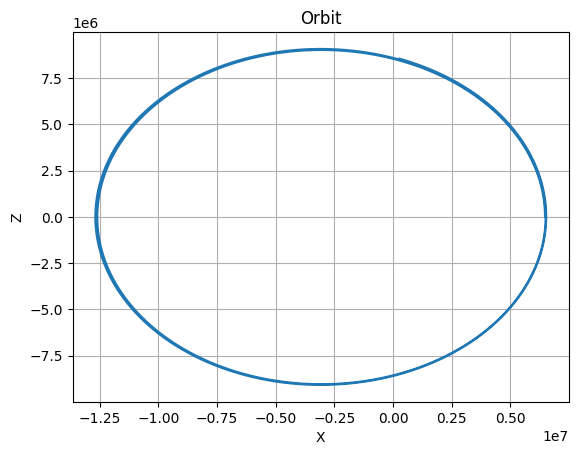

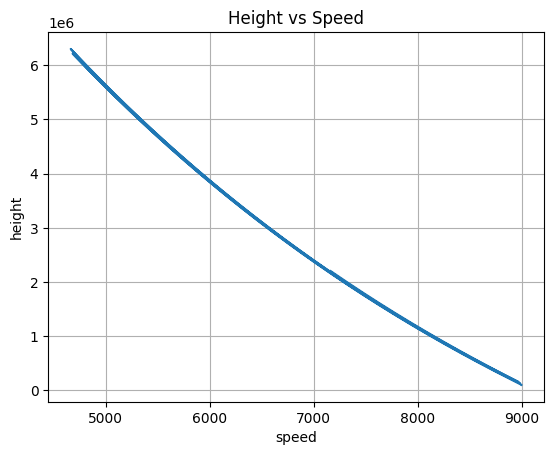

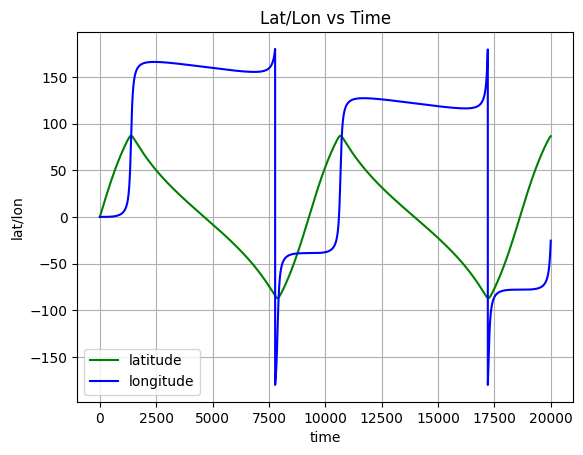

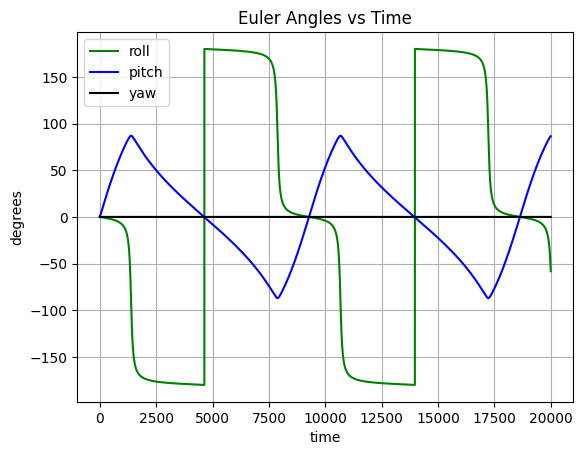

In [10]:
import matplotlib.pyplot as plt
#
gvImperialData = \
{
    'altitudeMsl_ft': ['ft', 'm'], 
    'longitude_deg': ['deg', 'rad'],
    'latitude_deg': ['deg', 'rad'],
    'localGravity_ft_s2': ['ft_s2', 'm_s2'],
    'gePosition_ft_X': ['ft', 'm'], 
    'gePosition_ft_Y': ['ft', 'm'], 
    'gePosition_ft_Z': ['ft', 'm'],
    'eulerAngle_deg_Yaw': ['deg', 'rad'],
    'eulerAngle_deg_Pitch': ['deg', 'rad'],
    'eulerAngle_deg_Roll': ['deg', 'rad'],
    'speedOfSound_ft_s': ['ft_s', 'm_s']
}
#
sim.RecData.CreateImperialData(gvImperialData)
#
fig1, a = plt.subplots()
a.plot(sim.RecData.Metric['eiPosition_m_X'], 
       sim.RecData.Metric['eiPosition_m_Z'])
a.set(xlabel='X', ylabel='Z', title='Orbit')
a.grid()

fig2, b = plt.subplots()
b.plot(sim.RecData.Metric['trueAirspeed_m_s'], 
       sim.RecData.Metric['altitudeMsl_m'])
b.set(xlabel='speed', ylabel='height', title='Height vs Speed')
b.grid()

t = sim.RecData.Metric['time']
fig3, c = plt.subplots()
c.plot(t, sim.RecData.Imperial['latitude_deg'],'g',
       t, sim.RecData.Imperial['longitude_deg'], 'b')
c.legend(["latitude","longitude"])
c.set(xlabel='time', ylabel='lat/lon', title='Lat/Lon vs Time')
c.grid()

fig4, d = plt.subplots()
d.plot(t, sim.RecData.Imperial['eulerAngle_deg_Roll'],'g',
       t, sim.RecData.Imperial['eulerAngle_deg_Pitch'], 'b',
       t, sim.RecData.Imperial['eulerAngle_deg_Yaw'], 'k')
d.legend(["roll","pitch","yaw"])
d.set(xlabel='time', ylabel='degrees', title='Euler Angles vs Time')
d.grid()

# Dragless Sphere

In [11]:
%%time
sim = OblateSim()
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "altitudeMsl": [30000, "ft"]
}
sim.Reset(ic)
sim.Run(30)

========= SetIC ==============
{'totalMass': 14.593902937, 'bodyMomentOfInertia_X': 4.88094466281336, 'bodyMomentOfInertia_Y': 4.88094466281336, 'bodyMomentOfInertia_Z': 4.88094466281336, 'altitudeMsl': 9144.0}
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ position_X = 0 [default]
++ position_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Z = 4.88094466281336 [IC case]
++ bodyP

In [12]:
from pierpont import util
#
sim.RecData.CreateImperialData(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/"
    "Atmos_01_sim_01.csv"
)
gvCC1 = util.GetNESCData(checkFile)
#
util.PrintErrorTable("Dragless Sphere: Oblate Earth", gvImperialData, 
                     sim, gvCC1)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Sphere: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    NC     
longitude_deg             0.0     0.0     NC     
latitude_deg              0.0     

# Dragless tumbling brick

In [13]:
%%time
from pierpont import ppont
#
sim = OblateSim()
ic = {
    "totalMass": [ 0.155404754, "slug"],
    "bodyMomentOfInertia_X": [0.00189422,"slugft2"],
    "bodyMomentOfInertia_Y": [0.006211019,"slugft2"],
    "bodyMomentOfInertia_Z": [0.007194665,"slugft2"],
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
sim.Reset(ic)
sim.Run(30.0)

========= SetIC ==============
{'totalMass': 2.2679618958243624, 'bodyMomentOfInertia_X': 0.002568217499776201, 'bodyMomentOfInertia_Y': 0.008421011121856215, 'bodyMomentOfInertia_Z': 0.009754656036800024, 'altitudeMsl': 9144.0, 'eulerAngleRate_Roll': 0.17453292519943295, 'eulerAngleRate_Pitch': 0.3490658503988659, 'eulerAngleRate_Yaw': 0.5235987755982988}
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ position_X = 0 [default]
++ position_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0.17453292519943295 [IC case]
++ eulerAngleRate_Pitch = 0.3490658503988659 [IC case]
++ eulerAngleRate

In [14]:
from pierpont import util
#
sim.RecData.CreateImperialData(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_02_TumblingBrickNoDamping/"
    "Atmos_02_sim_01.csv"
)
gvCC2 = util.GetNESCData(checkFile)
#
util.PrintErrorTable("Dragless Tumbling Brick: Oblate Earth", gvImperialData, 
                    sim, gvCC2)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Tumbling Brick: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    NC     
longitude_deg             0.0     0.0     NC     
latitude_deg              

# Tumbling brick with damping

In [15]:
%%time
from pierpont import ppont
#
class testSim(OblateSim):
    def SetAeroInputs(self):
        trueAirspeed = self.Planet.trueAirspeed_m_s
        self.Data["trueAirspeed"] = trueAirspeed * self.MeterToFeet
        self.Data["bodyAngularRate_Roll"] = self.Eom.X[10]
        self.Data["bodyAngularRate_Pitch"] = self.Eom.X[11]
        self.Data["bodyAngularRate_Yaw"] = self.Eom.X[12]
        return
#
ic = {
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
#
sim = testSim()
sim.SetAeroModel('models/brick_damping.dml')
sim.Reset(ic)
sim.Run(30.0)

*******************************************
Model:  Brick Model with Damping
creation date:  2022-12-25
file version:  Initial
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( VRW )
++> Input:  bodyAngularRate_Roll ( PB )
++> Input:  bodyAngularRate_Pitch ( QB )
++> Input:  bodyAngularRate_Yaw ( RB )
++> Output:  Cl
++> Output:  Cm
++> Output:  Cn
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'altitudeMsl': 9144.0, 'eulerAngleRate_Roll': 0.17453292519943295, 'eulerAngleRate_Pitch': 0.3490658503988659, 'eulerAngleRate_Yaw': 0.5235987755982988}
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [DML model]
++ referenceWingSpan = 0.101598984 [DML model]
++ referenceWingChord = 0.203201016 [DML model]
++ referenceWingArea = 0.020644913548800003 [DML model]
++ trueAirspeed = 0.0 [DML model]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl

In [16]:
from pierpont import util
#
sim.RecData.CreateImperialData(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_03_TumblingBrickDamping/"
    "Atmos_03_sim_01.csv"
)
gvCC3 = util.GetNESCData(checkFile)
#
util.PrintErrorTable("Tumbling Brick Damping: Oblate Earth", 
                     gvImperialData, sim, gvCC3)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Tumbling Brick Damping: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.141   0.022   NC     
longitude_deg             0.0     0.0     NC     
latitude_deg              0

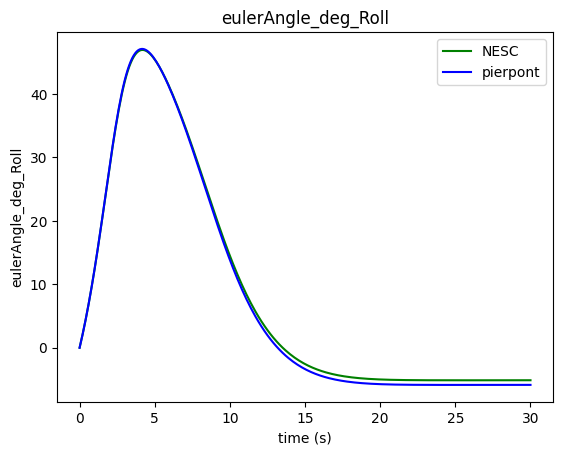

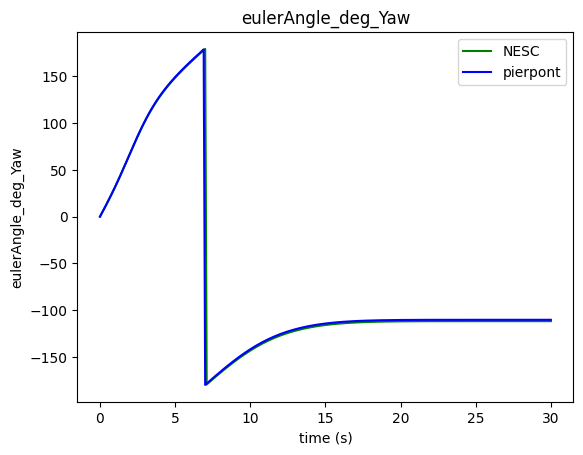

In [17]:
MakePlot(sim, gvCC3, 'eulerAngle_deg_Roll')
MakePlot(sim, gvCC3, 'eulerAngle_deg_Yaw')